In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from unidecode import unidecode

2023-05-03 21:06:37.375341: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-03 21:06:37.446031: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-03 21:06:37.595148: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-03 21:06:37.595907: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-03 21:06:38.513233: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [2]:
# Carregue os dados do CSV em um DataFrame do Pandas:
df = pd.read_csv('./dados.csv', delimiter=';')

dataframes_por_letra = {}

# Separe o DataFrame por letra inicial:
for letra in df['Name'].str[0].unique():
    dataframes_por_letra[letra] = df[df['Name'].str[0] == letra]


In [4]:
letras = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
data = []


In [14]:
for letra in letras:
  df = dataframes_por_letra[letra]

  # Divida os dados em recursos e rótulos:
  X = df['Name']
  y = df['Gender']

  # Remova acentos e caracteres problemáticos:

  def remove_accents(text):
      return unidecode(text)
  
  # Transforme os dados de texto em vetores numéricos usando o CountVectorizer do Scikit-learn:
  vectorizer = CountVectorizer(preprocessor=remove_accents)
  X = vectorizer.fit_transform(X)

  # Divida os dados em conjuntos de treinamento e teste:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

  # Padronize os recursos usando o StandardScaler do Scikit-learn:
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train.toarray())
  X_test = scaler.transform(X_test.toarray())

  # Crie um modelo sequencial com o Keras:
  model = Sequential()
  model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(1, activation='sigmoid'))

  # Compile o modelo com a função de perda, otimizador e métricas:
  optimizer = Adam(learning_rate=0.01)
  model.compile(loss='binary_crossentropy',
                optimizer=optimizer, metrics=['accuracy'])

  # Treine o modelo com os dados de treinamento:
  early_stopping = EarlyStopping(monitor='val_loss', patience=3)
  history = model.fit(X_train, y_train, epochs=20, batch_size=32,
                      validation_data=(X_test, y_test), callbacks=[early_stopping])

  # Avalie o desempenho do modelo com os dados de teste:
  score = model.evaluate(X_test, y_test, batch_size=32)
  print(f"Acurácia da letra {letra}: ", score[1])

  data.append({'letter': letra, 'accuracy': score[1]})


TypeError: unhashable type: 'list'

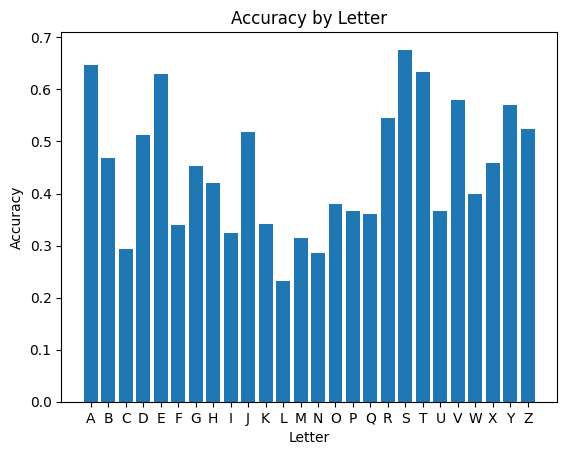

In [6]:
import matplotlib.pyplot as plt

df = pd.DataFrame(data)
plt.bar(df['letter'], df['accuracy'])
plt.xlabel('Letter')
plt.ylabel('Accuracy')
plt.title('Accuracy by Letter')
plt.show()

In [7]:
df

,letter,accuracy
0,A,0.646726
1,B,0.468476
2,C,0.294293
3,D,0.512262
4,E,0.629560
5,F,0.338824
6,G,0.453691
7,H,0.420290
8,I,0.323340
9,J,0.517898
